In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import plotter as pltr
pltr.set_backend(pltr.MatplotlibBackend)
%matplotlib inline

In [2]:
xform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='/data/pytorch/cifar', train=True, download=True, transform=xform)
testset = torchvision.datasets.CIFAR10(root='/data/pytorch/cifar', train=False, download=True, transform=xform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
images, labels = iter(trainloader).next()

In [6]:
# Images dim is batch_size x channels x height x width
print(images.size(), labels.size())

torch.Size([4, 3, 32, 32]) torch.Size([4])


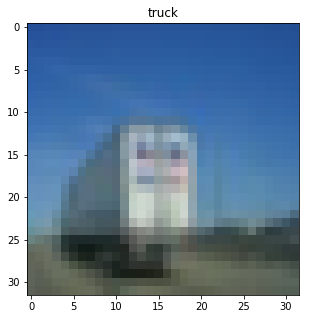

In [8]:
ndx = 3
image = images[ndx]
label = classes[labels[ndx].item()]
image = (image * 0.5) + 0.5  # un-normalize the image
image = np.transpose(image.numpy(), (1, 2, 0))  # The orig image is channel first, make it channel last for plotting
pltr.show_plot(label, pltr.RgbImage(image))

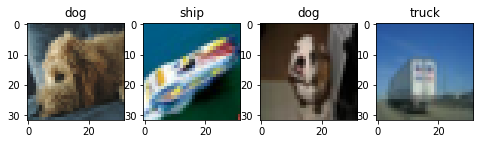

In [10]:
def plot_images(images, labels):
    class_labels = []
    rgb_images = []
    for label, image in zip(labels, images):
        class_label = classes[label.item()]
        rgb_image = (image * 0.5) + 0.5
        rgb_image = np.transpose(rgb_image.numpy(), (1, 2, 0))
        rgb_image = pltr.RgbImage(rgb_image)
        class_labels.append(class_label)
        rgb_images.append([rgb_image])
    pltr.show_frame(1, 4, 200, 800, class_labels, rgb_images)
    
plot_images(images, labels)

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()

In [19]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
for epoch in range(2):
    tot_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        tot_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1}, {i+1}] loss: {tot_loss/2000:.3f}')
            tot_loss = 0.0
            
print('Finished Training')

[1, 2000] loss: 1.626
[1, 4000] loss: 1.540
[1, 6000] loss: 1.480
[1, 8000] loss: 1.439
[1, 10000] loss: 1.390
[1, 12000] loss: 1.371
[2, 2000] loss: 1.305
[2, 4000] loss: 1.276
[2, 6000] loss: 1.258
[2, 8000] loss: 1.259
[2, 10000] loss: 1.239
[2, 12000] loss: 1.227
Finished Training


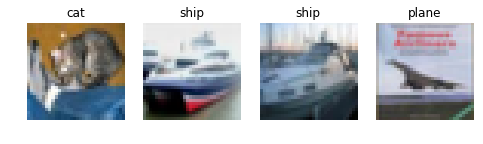

In [24]:
images, labels = iter(testloader).next()
plot_images(images, labels)

In [25]:
outputs = net(images)
_, pred = torch.max(outputs, 1)
pred_labels = [classes[i] for i in pred]
print(pred_labels)

['cat', 'ship', 'ship', 'plane']


In [27]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
accuracy = 100 * correct / total        
print(f'Accuracy of the ntework on the 10000 test imges: {accuracy}%')

Accuracy of the ntework on the 10000 test imges: 55.63%
